In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [159]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [160]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [161]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [162]:
df.reset_index(drop=True,inplace=True)

In [163]:
df.drop(all_indices,axis=0,inplace= True)

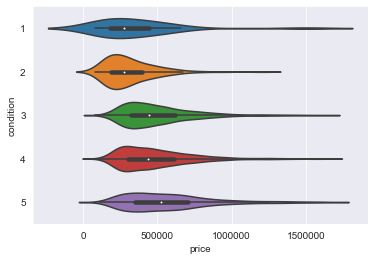

In [164]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

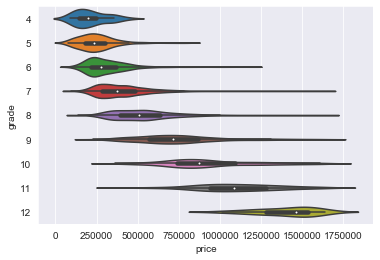

In [165]:
sns.violinplot(x='price', y='grade', data=df, orient='h')
plt.show()

In [166]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

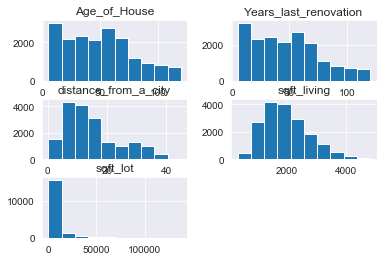

In [167]:
df[features].hist();

In [168]:
tobox =['sqft_living','distance_from_a_city','sqft_lot']

In [169]:
for feat in tobox:
    df[feat],l = scs.boxcox(df[feat])


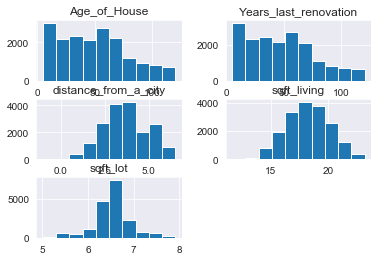

In [170]:
df[features].hist();

In [171]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [172]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']


In [173]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [174]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [175]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [176]:
df['grade4'] = df.grade.apply(lambda x: 1 if x ==4 else 0)
df['grade5'] = df.grade.apply(lambda x: 1 if x ==5 else 0)
df['grade6'] = df.grade.apply(lambda x: 1 if x ==6 else 0)
df['grade7'] = df.grade.apply(lambda x: 1 if x ==7 else 0)
df['grade8'] = df.grade.apply(lambda x: 1 if x ==8 else 0)
df['grade9'] = df.grade.apply(lambda x: 1 if x ==9 else 0)
df['grade10'] = df.grade.apply(lambda x: 1 if x ==10 else 0)
df['grade11'] = df.grade.apply(lambda x: 1 if x ==11 else 0)


In [177]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [178]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation','basement',
           'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9',
       'grade10', 'grade11']
outcome = ['price']

In [179]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'basement', 'cond3',
#        'cond4', 'cond5']
# outcome = ['price']

In [180]:
X = df[x_cols]
y = df['price']

In [181]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          1.912e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:48:04   Log-Likelihood:                     -2.4132e+05
No. Observations:               18208   AIC:                                  4.827e+05
Df Residuals:                   18193   BIC:                                  4.828e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.859e+04   1371.848    -13.549      0.000   -2.13e+04   -1.59e+04
bathrooms              2.399e+04   1791.694     13.391      0.000    2.05e+04    2.75e+04
sqft_living            1.023e+05   2189.749     46.726      0.000     9.8e+04    1.07e+05
sqft_lot               2.478e+04   1276.234     19.418      0.000    2.23e+04    2.73e+04
distance_from_a_city  -1.222e+05   1259.026    -97.073      0.000   -1.25e+05    -1.2e+05
Years_last_renovation  2.681e+04   1466.545     18.279      0.000    2.39e+04    2.97e+04
basement              -1.401e+04   2349.114     -5.964      0.000   -1.86e+04   -9404.628
grade4                 4.662e+05   2.79e+04     16.694      0.000    4.11e+05    5.21e+05
grade5                 4.318e+05   1.03e+04     41.911      0.000    4.12e+05    4.52e+05
grade6                 4.195e+05   4102.948    102.237      0.000    4.11e+05    4.28e+05
grade7                  4.56e+05   2070.457    220.264      0.000    4.52e+05     4.6e+05
grade8                 5.163e+05   2203.705    234.278      0.000    5.12e+05    5.21e+05
grade9                 6.377e+05   3474.975    183.498      0.000    6.31e+05    6.44e+05
grade10                7.406e+05   5525.549    134.038      0.000     7.3e+05    7.51e+05
grade11                8.619e+05   1.05e+04     82.408      0.000    8.41e+05    8.82e+05
==============================================================================
Omnibus:                     6151.451   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46844.444
Skew:                           1.418   Prob(JB):                         0.00
Kurtosis:                      10.328   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

15 15
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.859e+04,1371.848,-13.549,0.0,-2.13e+04,-1.59e+04
bathrooms,2.399e+04,1791.694,13.391,0.0,2.05e+04,2.75e+04
sqft_living,1.023e+05,2189.749,46.726,0.0,9.8e+04,1.07e+05
sqft_lot,2.478e+04,1276.234,19.418,0.0,2.23e+04,2.73e+04
distance_from_a_city,-1.222e+05,1259.026,-97.073,0.0,-1.25e+05,-1.2e+05


In [183]:
X = df[x_cols]
y= df['price']

In [184]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          1.912e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:48:05   Log-Likelihood:                     -2.4132e+05
No. Observations:               18208   AIC:                                  4.827e+05
Df Residuals:                   18193   BIC:                                  4.828e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.859e+04   1371.848    -13.549      0.000   -2.13e+04   -1.59e+04
bathrooms              2.399e+04   1791.694     13.391      0.000    2.05e+04    2.75e+04
sqft_living            1.023e+05   2189.749     46.726      0.000     9.8e+04    1.07e+05
sqft_lot               2.478e+04   1276.234     19.418      0.000    2.23e+04    2.73e+04
distance_from_a_city  -1.222e+05   1259.026    -97.073      0.000   -1.25e+05    -1.2e+05
Years_last_renovation  2.681e+04   1466.545     18.279      0.000    2.39e+04    2.97e+04
basement              -1.401e+04   2349.114     -5.964      0.000   -1.86e+04   -9404.628
grade4                 4.662e+05   2.79e+04     16.694      0.000    4.11e+05    5.21e+05
grade5                 4.318e+05   1.03e+04     41.911      0.000    4.12e+05    4.52e+05
grade6                 4.195e+05   4102.948    102.237      0.000    4.11e+05    4.28e+05
grade7                  4.56e+05   2070.457    220.264      0.000    4.52e+05     4.6e+05
grade8                 5.163e+05   2203.705    234.278      0.000    5.12e+05    5.21e+05
grade9                 6.377e+05   3474.975    183.498      0.000    6.31e+05    6.44e+05
grade10                7.406e+05   5525.549    134.038      0.000     7.3e+05    7.51e+05
grade11                8.619e+05   1.05e+04     82.408      0.000    8.41e+05    8.82e+05
==============================================================================
Omnibus:                     6151.451   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46844.444
Skew:                           1.418   Prob(JB):                         0.00
Kurtosis:                      10.328   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7994183918089364),
 ('bathrooms', 3.0693591542955168),
 ('sqft_living', 4.584674238051909),
 ('sqft_lot', 1.5573294134459255),
 ('distance_from_a_city', 1.5156170329723033),
 ('Years_last_renovation', 2.056415981889033),
 ('basement', 2.016387794441262),
 ('grade4', 1.0240728430059116),
 ('grade5', 1.109048074165633),
 ('grade6', 1.5550322378783683),
 ('grade7', 1.7494068290278402),
 ('grade8', 1.3419585027970211),
 ('grade9', 1.3735465978338155),
 ('grade10', 1.30353582446713),
 ('grade11', 1.1143357132440659)]

In [186]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

15 15


In [187]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          1.912e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        16:48:05   Log-Likelihood:                     -2.4132e+05
No. Observations:               18208   AIC:                                  4.827e+05
Df Residuals:                   18193   BIC:                                  4.828e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.859e+04   1371.848    -13.549      0.000   -2.13e+04   -1.59e+04
bathrooms              2.399e+04   1791.694     13.391      0.000    2.05e+04    2.75e+04
sqft_living            1.023e+05   2189.749     46.726      0.000     9.8e+04    1.07e+05
sqft_lot               2.478e+04   1276.234     19.418      0.000    2.23e+04    2.73e+04
distance_from_a_city  -1.222e+05   1259.026    -97.073      0.000   -1.25e+05    -1.2e+05
Years_last_renovation  2.681e+04   1466.545     18.279      0.000    2.39e+04    2.97e+04
basement              -1.401e+04   2349.114     -5.964      0.000   -1.86e+04   -9404.628
grade4                 4.662e+05   2.79e+04     16.694      0.000    4.11e+05    5.21e+05
grade5                 4.318e+05   1.03e+04     41.911      0.000    4.12e+05    4.52e+05
grade6                 4.195e+05   4102.948    102.237      0.000    4.11e+05    4.28e+05
grade7                  4.56e+05   2070.457    220.264      0.000    4.52e+05     4.6e+05
grade8                 5.163e+05   2203.705    234.278      0.000    5.12e+05    5.21e+05
grade9                 6.377e+05   3474.975    183.498      0.000    6.31e+05    6.44e+05
grade10                7.406e+05   5525.549    134.038      0.000     7.3e+05    7.51e+05
grade11                8.619e+05   1.05e+04     82.408      0.000    8.41e+05    8.82e+05
==============================================================================
Omnibus:                     6151.451   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46844.444
Skew:                           1.418   Prob(JB):                         0.00
Kurtosis:                      10.328   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

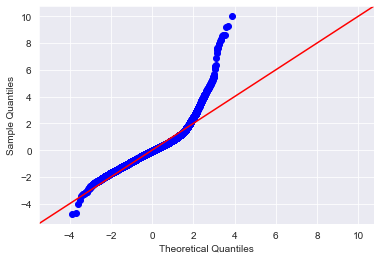

In [188]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


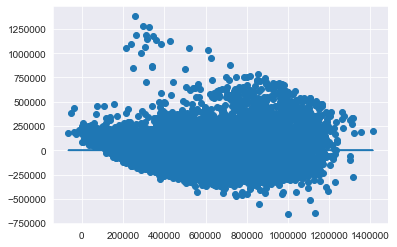

In [189]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

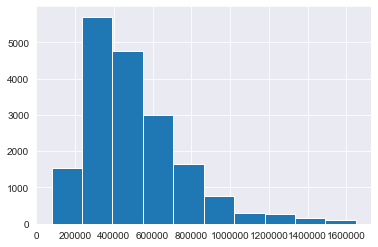

In [190]:
df.price.hist()

In [191]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 675960.0
0.81 percentile: 690000.0
0.82 percentile: 700000.0
0.83 percentile: 716000.0
0.84 percentile: 730000.0
0.85 percentile: 746474.9999999995
0.86 percentile: 760000.0
0.87 percentile: 775000.0
0.88 percentile: 795000.0
0.89 percentile: 810229.9999999997
0.9 percentile: 834000.0
0.91 percentile: 855000.0
0.92 percentile: 880000.0
0.93 percentile: 911559.0000000019
0.94 percentile: 950000.0
0.95 percentile: 991629.9999999995
0.96 percentile: 1060000.0
0.97 percentile: 1160000.0
0.98 percentile: 1260000.0
0.99 percentile: 1400000.0


In [192]:
orig_tot = len(df)
df = df[df.price < 1000000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.04822056239015817


In [193]:
X = df[x_cols]
y = df['price']

In [194]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2986.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:48:07   Log-Likelihood:            -2.2494e+05
No. Observations:               17330   AIC:                         4.499e+05
Df Residuals:                   17315   BIC:                         4.500e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.434e+04   1078.552    -13.298      0.000   -1.65e+04   -1.22e+04
bathrooms              1.345e+04   1415.443      9.504      0.000    1.07e+04    1.62e+04
sqft_living            8.623e+04   1718.928     50.163      0.000    8.29e+04    8.96e+04
sqft_lot               1.989e+04    998.125     19.927      0.000    1.79e+04    2.18e+04
distance_from_a_city  -1.039e+05    998.547   -104.071      0.000   -1.06e+05   -1.02e+05
Years_last_renovation  2.063e+04   1171.353     17.614      0.000    1.83e+04    2.29e+04
basement              -1.945e+04   1836.399    -10.590      0.000    -2.3e+04   -1.58e+04
grade4                 4.216e+05   2.13e+04     19.832      0.000     3.8e+05    4.63e+05
grade5                 3.993e+05   7861.177     50.799      0.000    3.84e+05    4.15e+05
grade6                 3.968e+05   3161.079    125.525      0.000    3.91e+05    4.03e+05
grade7                 4.475e+05   1598.503    279.921      0.000    4.44e+05    4.51e+05
grade8                 5.108e+05   1708.695    298.935      0.000    5.07e+05    5.14e+05
grade9                 6.019e+05   2798.425    215.077      0.000    5.96e+05    6.07e+05
grade10                6.604e+05   4841.985    136.398      0.000    6.51e+05     6.7e+05
grade11                7.165e+05   1.28e+04     55.789      0.000    6.91e+05    7.42e+05
==============================================================================
Omnibus:                      525.269   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.599
Skew:                           0.301   Prob(JB):                    3.17e-175
Kurtosis:                       3.866   Cond. No.                         42.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

15 15
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.434e+04,1078.552,-13.298,0.0,-1.65e+04,-1.22e+04
bathrooms,1.345e+04,1415.443,9.504,0.0,1.07e+04,1.62e+04
sqft_living,8.623e+04,1718.928,50.163,0.0,8.29e+04,8.96e+04
sqft_lot,1.989e+04,998.125,19.927,0.0,1.79e+04,2.18e+04
distance_from_a_city,-1.039e+05,998.547,-104.071,0.0,-1.06e+05,-1.02e+05


In [196]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2986.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:48:07   Log-Likelihood:            -2.2494e+05
No. Observations:               17330   AIC:                         4.499e+05
Df Residuals:                   17315   BIC:                         4.500e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.434e+04   1078.552    -13.298      0.000   -1.65e+04   -1.22e+04
bathrooms              1.345e+04   1415.443      9.504      0.000    1.07e+04    1.62e+04
sqft_living            8.623e+04   1718.928     50.163      0.000    8.29e+04    8.96e+04
sqft_lot               1.989e+04    998.125     19.927      0.000    1.79e+04    2.18e+04
distance_from_a_city  -1.039e+05    998.547   -104.071      0.000   -1.06e+05   -1.02e+05
Years_last_renovation  2.063e+04   1171.353     17.614      0.000    1.83e+04    2.29e+04
basement              -1.945e+04   1836.399    -10.590      0.000    -2.3e+04   -1.58e+04
grade4                 4.216e+05   2.13e+04     19.832      0.000     3.8e+05    4.63e+05
grade5                 3.993e+05   7861.177     50.799      0.000    3.84e+05    4.15e+05
grade6                 3.968e+05   3161.079    125.525      0.000    3.91e+05    4.03e+05
grade7                 4.475e+05   1598.503    279.921      0.000    4.44e+05    4.51e+05
grade8                 5.108e+05   1708.695    298.935      0.000    5.07e+05    5.14e+05
grade9                 6.019e+05   2798.425    215.077      0.000    5.96e+05    6.07e+05
grade10                6.604e+05   4841.985    136.398      0.000    6.51e+05     6.7e+05
grade11                7.165e+05   1.28e+04     55.789      0.000    6.91e+05    7.42e+05
==============================================================================
Omnibus:                      525.269   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.599
Skew:                           0.301   Prob(JB):                    3.17e-175
Kurtosis:                       3.866   Cond. No.                         42.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7960744878262547),
 ('bathrooms', 2.955325028531235),
 ('sqft_living', 4.272658928001195),
 ('sqft_lot', 1.5701020057408872),
 ('distance_from_a_city', 1.522817784234179),
 ('Years_last_renovation', 2.133683388933204),
 ('basement', 1.239294640506139),
 ('grade4', 1.0255237506967718),
 ('grade5', 1.116531523968489),
 ('grade6', 1.592174017585359),
 ('grade7', 1.797227689316178),
 ('grade8', 1.3534824539510555),
 ('grade9', 1.3245950988149346),
 ('grade10', 1.204775311246567),
 ('grade11', 1.033280236124469)]

In [198]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

15 15


In [199]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2986.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:48:07   Log-Likelihood:            -2.2494e+05
No. Observations:               17330   AIC:                         4.499e+05
Df Residuals:                   17315   BIC:                         4.500e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.434e+04   1078.552    -13.298      0.000   -1.65e+04   -1.22e+04
bathrooms              1.345e+04   1415.443      9.504      0.000    1.07e+04    1.62e+04
sqft_living            8.623e+04   1718.928     50.163      0.000    8.29e+04    8.96e+04
sqft_lot               1.989e+04    998.125     19.927      0.000    1.79e+04    2.18e+04
distance_from_a_city  -1.039e+05    998.547   -104.071      0.000   -1.06e+05   -1.02e+05
Years_last_renovation  2.063e+04   1171.353     17.614      0.000    1.83e+04    2.29e+04
basement              -1.945e+04   1836.399    -10.590      0.000    -2.3e+04   -1.58e+04
grade4                 4.216e+05   2.13e+04     19.832      0.000     3.8e+05    4.63e+05
grade5                 3.993e+05   7861.177     50.799      0.000    3.84e+05    4.15e+05
grade6                 3.968e+05   3161.079    125.525      0.000    3.91e+05    4.03e+05
grade7                 4.475e+05   1598.503    279.921      0.000    4.44e+05    4.51e+05
grade8                 5.108e+05   1708.695    298.935      0.000    5.07e+05    5.14e+05
grade9                 6.019e+05   2798.425    215.077      0.000    5.96e+05    6.07e+05
grade10                6.604e+05   4841.985    136.398      0.000    6.51e+05     6.7e+05
grade11                7.165e+05   1.28e+04     55.789      0.000    6.91e+05    7.42e+05
==============================================================================
Omnibus:                      525.269   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.599
Skew:                           0.301   Prob(JB):                    3.17e-175
Kurtosis:                       3.866   Cond. No.                         42.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

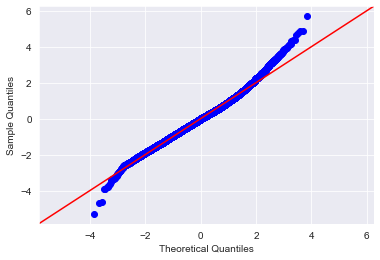

In [200]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


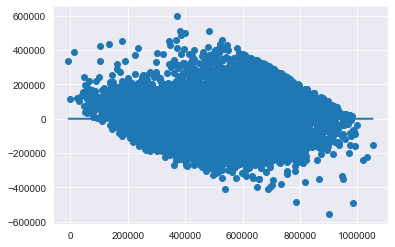

In [201]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [202]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [203]:
residuals = model.resid

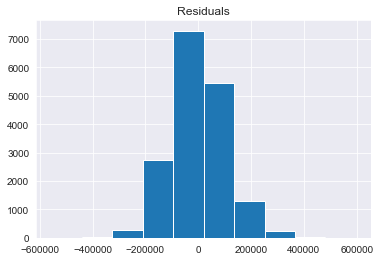

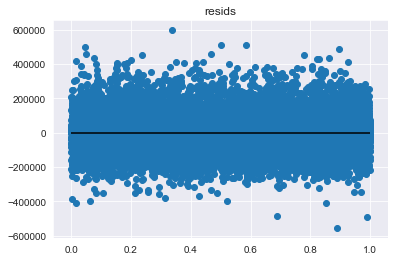

In [204]:
plot_residuals(residuals)

In [205]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [206]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [207]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.7047296375164892, 0.7038027432270659, 0.7041246201518736)

In [208]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-81420.3388582392, -81403.20252318143, -81326.85442614809)

In [209]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.706444088124781

In [210]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [211]:
make_ols_sklearn(X, y)

train R2 score = 0.7081472476876614
test R2 score = 0.7017489539658222
cv5 R2 score = 0.7047296375164892
cv10 R2 score = 0.7038027432270659
cv5 MSE score = -11063809455.81392
cv10  MSE score = -11062360048.168772


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [212]:
X_shuff, y_shuff = shuffle(X, y)

In [213]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.705906647011483

In [214]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7061888877367211

In [215]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.706616473251683

In [216]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2986.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:48:29   Log-Likelihood:            -2.2494e+05
No. Observations:               17330   AIC:                         4.499e+05
Df Residuals:                   17315   BIC:                         4.500e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.434e+

In [217]:
residuals = model.resid
resid = pd.DataFrame(df['price'])
resid['residuals']  = residuals

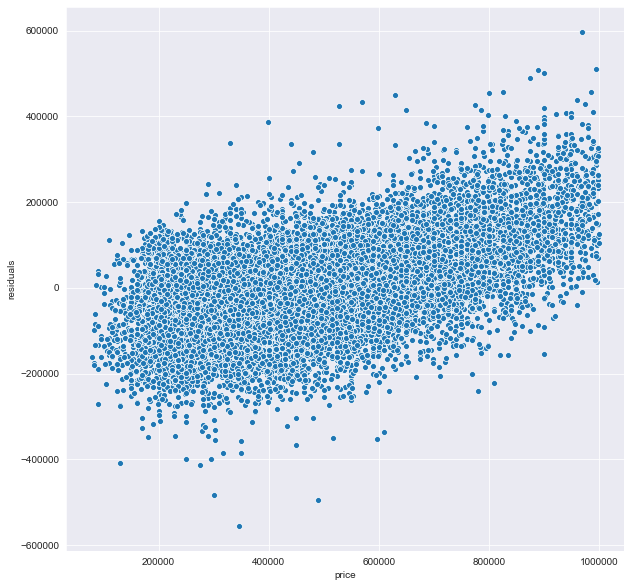

In [218]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)